# Problema de Negocio

En el problema planteado se requiere definir el perfil de los clientes potenciales que compra el producto, analizando los features que lo defininen como son la Edad, Pais, Programa consultado, Univerisidad, etc.

#### Elementos a considerar para el planteo

Para afrontar el planteo presentado anteriormente es necesario tener en cuenta las siguientes consideraciones:

- La empresa ofrece programas de estudios a diferentes clientes potenciales con el fin de poder realizar la conversion
- El clientel potencial deriva de diferente fuentes como pueden ser redes sociales o landing page donde los mismos presentan los datos 
- Los cliente preceden de diferentes paises de latinoamerica y tiene caracteristicas diferentes que los definen como consumidor
- Una vez obtenido los datos del cliente potencial, los mismos son contactados por medio de llamadas, email o mesajes con el fin de poder convertir los clientes potenciales en alumnos


# Datos del Negocio

Para el analisis del problema planteado se presento una Base de datos que contiene todos los clientes potenciales junto con las caracterisiticas asociadas a cada uno y una columnas que contiene booleanos, la cual determina si el cliente potencial realizo o no la compra del programa. Para entender mejor la Base de datos se presentan las columnas junto con la explicacion de cada una de ellas.

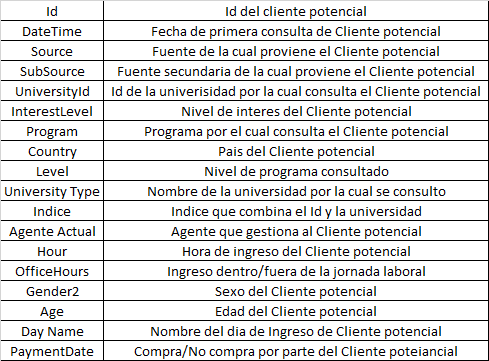

# Analisis de los datos 

A continuacion se realiza el analisis de los diferentes features con el fin de determinar relaciones y estudiar el comportamiento de los mismos, con el objetivo de definir cual es el algoritmo mas conveniente y poder preparar los datos para aplicarlo

In [61]:
#Importo las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [62]:
#Importo el archivo csv con el Dataset
df = pd.read_csv('C:\\Users\\ACER\\Documents\\Burgo Juan\\Coder - Data Science\\Proyecto Final\\DataBase - Copy.csv')
df.head()

,Id,DateTime,Source,SubSource,UniversityId,InterestLevel,Program,Country,Level,University Type,Indice,Agente Actual,Hour,OfficeHours,Gender2,Age,Day Name,PaymentDate
0,209512,22-Jul-21,Social,Instagram Paid Ad,106,NaN,UNDEFINED,Colombia,Undefined,TU,209512TU,Agustin Solowinski,1,Out,Other,NaN,jueves,0
1,209562,22-Jul-21,Social,Instagram Paid Ad,106,NaN,UNDEFINED,Argentina,Undefined,TU,209562TU,Franco Vega,3,Out,Other,NaN,jueves,0
2,209676,22-Jul-21,Social,FB Paid Ad,106,NaN,UNDEFINED,Ecuador,Undefined,TU,209676TU,Franco Vega,9,Out,Other,NaN,jueves,0
3,209867,22-Jul-21,Social,Instagram Paid Ad,106,NaN,UNDEFINED,Ecuador,Undefined,TU,209867TU,Franco Vega,12,In,Other,NaN,jueves,0
4,209836,22-Jul-21,Social,Instagram Paid Ad,106,NaN,UNDEFINED,Per�,Undefined,TU,209836TU,Agustin Solowinski,11,In,Other,NaN,jueves,0


In [63]:
# Presento la informacion del Data set para que el tipo de datos que tengo y si se presentan valores nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239325 entries, 0 to 239324
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Id               239325 non-null  int64  
 1   DateTime         239325 non-null  object 
 2   Source           239325 non-null  object 
 3   SubSource        239325 non-null  object 
 4   UniversityId     239325 non-null  int64  
 5   InterestLevel    42046 non-null   object 
 6   Program          239325 non-null  object 
 7   Country          239313 non-null  object 
 8   Level            239325 non-null  object 
 9   University Type  239325 non-null  object 
 10  Indice           239325 non-null  object 
 11  Agente Actual    239325 non-null  object 
 12  Hour             239325 non-null  int64  
 13  OfficeHours      239325 non-null  object 
 14  Gender2          239325 non-null  object 
 15  Age              8557 non-null    float64
 16  Day Name         239325 non-null  obje

In [64]:
#Consulto la cantidad de filas y columnas del DataSet
df.shape

(239325, 18)

In [66]:
# Modifico el tipo de dato de la columna "Date Time"
df["DateTime"]=pd.to_datetime(df["DateTime"]) 

In [67]:
# Presento nuevamente la informacion del Data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239325 entries, 0 to 239324
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Id               239325 non-null  int64         
 1   DateTime         239325 non-null  datetime64[ns]
 2   Source           239325 non-null  object        
 3   SubSource        239325 non-null  object        
 4   UniversityId     239325 non-null  int64         
 5   InterestLevel    42046 non-null   object        
 6   Program          239325 non-null  object        
 7   Country          239313 non-null  object        
 8   Level            239325 non-null  object        
 9   University Type  239325 non-null  object        
 10  Indice           239325 non-null  object        
 11  Agente Actual    239325 non-null  object        
 12  Hour             239325 non-null  int64         
 13  OfficeHours      239325 non-null  object        
 14  Gender2          239

In [68]:
#Cuento la cantidad de veces en que se presenta cada pais.
df["Country"].value_counts()

Mexico               123614
Colombia              50266
Per�                  26372
Ecuador                9849
Argentina              7987
                      ...  
Macao                     1
Jamaica                   1
Zambia                    1
Costa de Marfil           1
Trinidad y Tobago         1
Name: Country, Length: 87, dtype: int64

In [69]:
#Cuento la cantidad de valores para cada columna del DataSet
df.count()

Id                 239325
DateTime           239325
Source             239325
SubSource          239325
UniversityId       239325
InterestLevel       42046
Program            239325
Country            239313
Level              239325
University Type    239325
Indice             239325
Agente Actual      239325
Hour               239325
OfficeHours        239325
Gender2            239325
Age                  8557
Day Name           239325
PaymentDate        239325
dtype: int64

In [70]:
#Consulto el tipo de cada columna del DataSet
df.dtypes

Id                          int64
DateTime           datetime64[ns]
Source                     object
SubSource                  object
UniversityId                int64
InterestLevel              object
Program                    object
Country                    object
Level                      object
University Type            object
Indice                     object
Agente Actual              object
Hour                        int64
OfficeHours                object
Gender2                    object
Age                       float64
Day Name                   object
PaymentDate                 int64
dtype: object

In [71]:
type(df)

pandas.core.frame.DataFrame

#### Analisis Univariado

<AxesSubplot:xlabel='Age', ylabel='Count'>

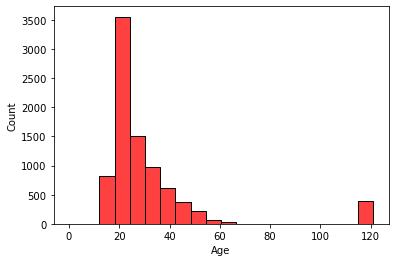

In [72]:
#Creo Histograma de la variable Edad
sns.histplot(df['Age'],kde=False,color='Red',bins=20)

<AxesSubplot:xlabel='Hour', ylabel='Count'>

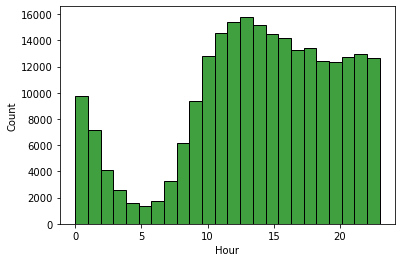

In [73]:
#Creo Histograma de la variable Hora de ingreso del Cliente potencial
sns.histplot(df['Hour'],kde=False,color='Green',bins=24)

#### Analisis Bivariado

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='University Type', ylabel='Hour'>

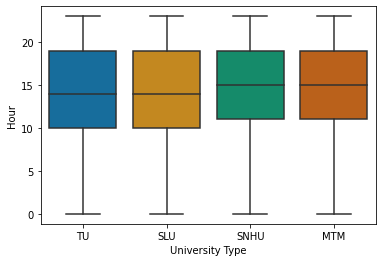

In [74]:
#Realizo un Boxplot entre la varible Universidad y la Hora de ingreso del Cliente potencial
sns.boxplot(df['University Type'],df['Hour'],palette='colorblind')

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='University Type', ylabel='Age'>

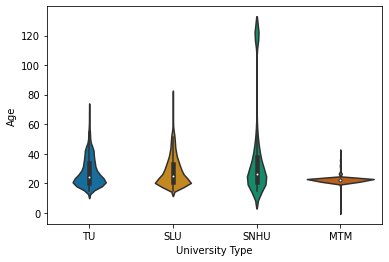

In [75]:
#Realizo un Violinplot entre la varible Universidad y la edad del Cliente potencial
sns.violinplot(df['University Type'],df['Age'],gridsize= 25, palette='colorblind')

# Algoritmo del Arbol de Decision

El algoritmo  de entrenamiento seleccionado fue el arbol de decision y continuacion se realizara la preparacion y aplicacion del algoritmo sobre la Base de Datos presentada anteriormente

In [76]:
#Creo un nuevo data frame reduciendo los datos que requiero para entrenar los algoritmos de clasificacion
DfTree= pd.DataFrame(df["University Type"])
DfTree["SubSource"]=df["SubSource"]
DfTree["Paid"]=df["PaymentDate"]
DfTree["Program"]=df["Program"]
DfTree["Country"]=df["Country"]
DfTree

,University Type,SubSource,Paid,Program,Country
0,TU,Instagram Paid Ad,0,UNDEFINED,Colombia
1,TU,Instagram Paid Ad,0,UNDEFINED,Argentina
2,TU,FB Paid Ad,0,UNDEFINED,Ecuador
3,TU,Instagram Paid Ad,0,UNDEFINED,Ecuador
4,TU,Instagram Paid Ad,0,UNDEFINED,Per�
...,...,...,...,...,...
239320,TU,FB Paid Ad,0,Lic. en Psicolog�a - Servicios Sociales,Colombia
239321,TU,FB Paid Ad,0,UNDEFINED,Per�
239322,TU,FB Paid Ad,0,Lic. en Psicolog�a - Servicios Sociales,Colombia
239323,TU,FB Paid Ad,0,UNDEFINED,Paraguay


In [77]:
#Comenzamos con la preparacion de nuestros datos
df_dummy = pd.get_dummies(DfTree, drop_first=True)
df_dummy

,Paid,University Type_SLU,University Type_SNHU,University Type_TU,SubSource_Agent Received Email,SubSource_Bing Organic,SubSource_Bing Search,SubSource_FB Fan Page Comment,SubSource_FB Paid Ad,SubSource_FB Paid Ad CPC,...,Country_Taiw�n,Country_Trinidad y Tobago,Country_Turqu�a,Country_USA,Country_Ucrania,Country_United States,Country_Uruguay,Country_Venezuela,Country_Vietnam,Country_Zambia
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239320,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
239321,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
239322,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
239323,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
#Separamos los datos de entrada de la salida
X = df_dummy.drop('Paid', axis=1) #Elimino de mi dataset la variable a predecir
y = df_dummy.Paid #Defino el Target


In [79]:
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [94]:
# Aplicamos el Arbol de decision
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
tree = DecisionTreeClassifier(max_depth=2, random_state = 42) #Creamos el modelo

In [95]:
#Entrenamos el modelo
tree.fit(X_train,y_train) #Entrenamos el modelo

DecisionTreeClassifier(max_depth=2, random_state=42)

In [97]:
y_train_pred_tree = tree.predict(X_train) #Prediccion en Train
y_test_pred_tree= tree.predict(X_test) #Prediccion en Test

## Indicadores de desempeño predictivo - Arbol de decision

#### Matriz de Confusion

In [99]:
# Presento la Matriz de confusion.
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test,y_test_pred_tree)
print (matriz)

[[71193     0]
 [  605     0]]


#### Exactitud

In [100]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred_tree)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.992228118452548
% de aciertos sobre el set de evaluación: 0.9915735814368088


#### Sensibilidad

In [101]:
#Calculo la sensibilidad en Test
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test,y_test_pred_tree)
print (sensibilidad)

0.0


### Puntaje F1

In [103]:
#Calculo el puntaje F1 en Test
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_test_pred_tree)
print (f1)

0.0


# Random Forest

In [88]:
# Aplicamos un Random Forest y entrenamos el modelo.
random = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
random.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=11)

In [104]:
y_test_pred_random = random.predict(X_test) #Prediccion en Test

## Indicadores de desempeño predictivo - Random Forest


#### Matriz de Confusion

In [105]:
#Presentamos la Matriz de confusion
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test,y_test_pred_random)
print (matriz)

[[61112 10081]
 [  324   281]]


#### Exactitud

In [106]:
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred_random)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.855079528677679


#### Sensibilidad 

In [107]:
#Calculo la sensibilidad en Test

from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test,y_test_pred_random)
print (sensibilidad)

0.4644628099173554


#### Puntaje F1

In [108]:
#Calculo el Puntaje F1 en Test

from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_test_pred_random)
print (f1)

0.051244643019969


# Comparacion Curva ROC y Area bajo la curva AUC

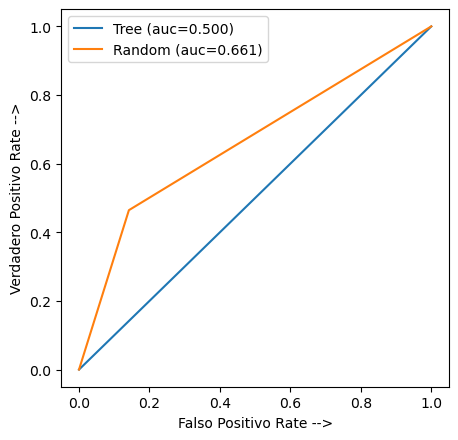

In [109]:
#Realizamos la comparacion de las curvas Roc tanto para el Arbol de decision como para el Random Forest y su respectivos valores AUC
from sklearn.metrics import roc_curve, auc

tree_fpr, tree_tpr, threshold = roc_curve(y_test,y_test_pred_tree)
auc_tree = auc(tree_fpr,tree_tpr)

random_fpr, random_tpr, threshold = roc_curve(y_test,y_test_pred_random)
auc_random = auc(random_fpr,random_tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(tree_fpr,tree_tpr,linestyle="-", label="Tree (auc=%0.3f)" % auc_tree)
plt.plot(random_fpr,random_tpr,linestyle="-", label="Random (auc=%0.3f)" % auc_random)

plt.xlabel("Falso Positivo Rate -->")
plt.ylabel("Verdadero Positivo Rate -->")

plt.legend()

plt.show()



# Resultados del modelo

Como podemos observar, de los dos algoritmos de clasificacion implementados, el que tuvo un mejor resultado sobre la base de datos analizada fue el Random forest, el cual luego de ser analizado con un AUC del 0,661. 
Es importante aclarar que si bien el Random forest obtuvo mejores resultados en comparacion con el arbol de decision, el mismo no presenta un comportamiento que permita solucionar el planteamiento del problema.